In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [ ]:
# reading the datset
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head(110)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,863030,M,13.11,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,...,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.19860,0.3147,0.14050,NaN
106,863031,B,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,29.26,85.51,521.7,0.1688,0.2660,0.2873,0.12180,0.2806,0.09097,NaN
107,863270,B,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,...,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185,NaN
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.29100,0.4055,0.09789,NaN


In [ ]:
# getting the whole information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# dropping unnecessary columns
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

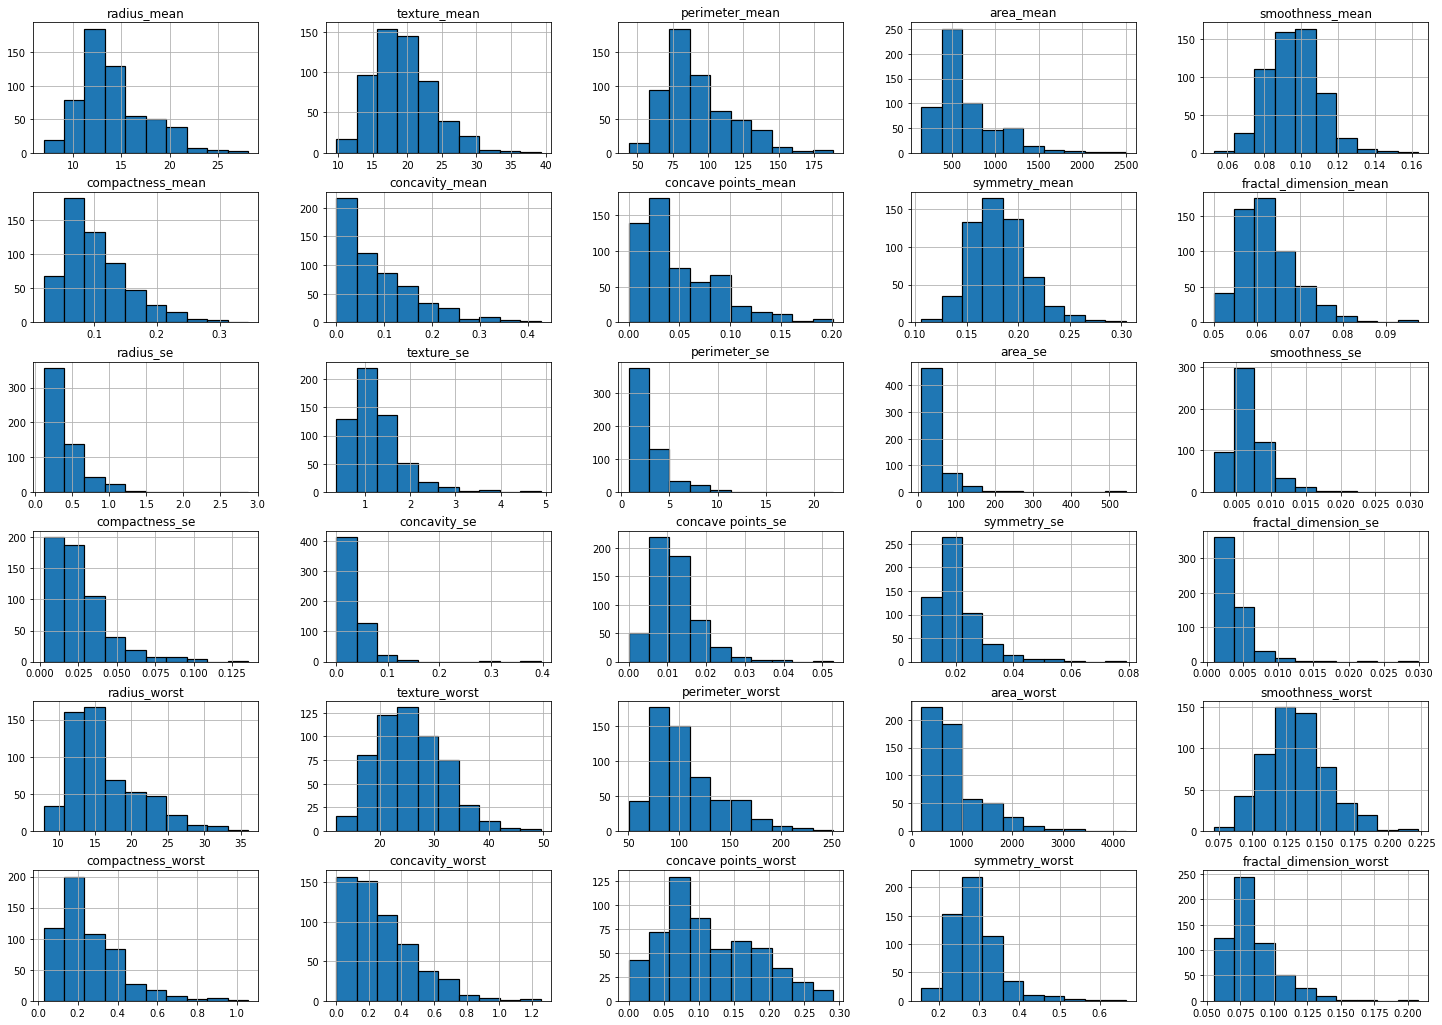

In [ ]:
# visualizing the distribution of all the features of the dataset
import matplotlib.pyplot as plt
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(25,18)
plt.show

In [ ]:
# mapping Malignant(M) to 1 and Benign(B) to 0
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


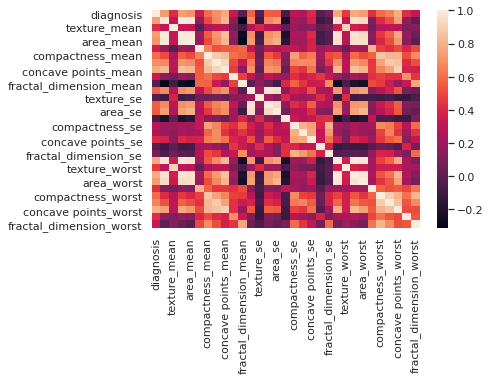

In [ ]:
# using heatmap getting an idea of correlation between the features of the dataset
import seaborn as sns
sns.set()

sns.heatmap(data.corr())

In [ ]:
# separating Input Features and the Output in X and y respectively
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [ ]:
# spliting the dataset into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# scaling the Input features using StandardScaler 
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

X_train_transformed = std_scalar.fit_transform(X_train)
X_test_transformed = std_scalar.transform(X_test)

# since scaling returns an array, we need to convert it back to Pandas DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

# in scaling column labels are lost, so we put back the labels using the Old X
X_train_transformed.columns = X.columns
X_test_transformed.columns = X.columns

X_train_transformed, X_test_transformed

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0      -0.110283     -0.850879       -0.083602  -0.218294         0.300118   
 1      -1.115090      0.044331       -1.110951  -0.966209         0.271248   
 2      -0.115804     -0.850879       -0.165949  -0.213351        -0.604245   
 3       0.455611      1.071467        0.446863   0.326992        -0.904497   
 4       0.024979     -0.608230       -0.088798  -0.085130        -2.327805   
 ..           ...           ...             ...        ...              ...   
 450    -0.521592     -0.678905       -0.532917  -0.529101        -0.348021   
 451    -0.725866     -0.085239       -0.732391  -0.697135        -0.799842   
 452     1.109840     -0.125288        1.046483   0.997755         0.066269   
 453    -1.079204      1.933695       -1.073375  -0.939576        -0.450511   
 454    -0.482945     -0.872082       -0.397803  -0.512078         2.256084   
 
      compactness_mean  concavity_mean  concave po

In [ ]:
# Will use different Algorithms and observe their results
# First we'll start with Linear Regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
lin_reg = LinearRegression()

lin_reg.fit(X_train_transformed, y_train)
y_predicted = lin_reg.predict(X_test_transformed)
# print(y_predicted, y_test)
print('MAE:', mean_absolute_error(y_test, y_predicted))
lin_reg.score(X_test_transformed, y_test)

MAE: 0.21262537668512135


0.6739642496796303

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_transformed, y_train)
y_predicted = log_reg.predict(X_test_transformed)
print('MAE:', mean_absolute_error(y_test, y_predicted))
log_reg.score(X_test_transformed, y_test)

MAE: 0.02631578947368421


0.9736842105263158

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_transformed, y_train)
y_predicted = rand_forest.predict(X_test_transformed)
print('MAE:', mean_absolute_error(y_test, y_predicted))
rand_forest.score(X_test_transformed, y_test)

MAE: 0.05263157894736842


0.9473684210526315

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier()
grad_boost_clf.fit(X_train_transformed, y_train)
y_predicted = grad_boost_clf.predict(X_test_transformed)
print('MAE:', mean_absolute_error(y_test, y_predicted))
grad_boost_clf.score(X_test_transformed, y_test)

MAE: 0.05263157894736842


0.9473684210526315

In [ ]:
"""We can observe that Logistic Regression 
yield better results and have very low margin for error""" 

'We can observe that Logistic Regression \nyield better results and have very low margin for error'